In [1]:
import twstock
import mplfinance as mpf
import pandas as pd

In [3]:
stock = twstock.Stock("2330")
data=stock.fetch_from(year=2023, month=3)


In [8]:
data[0].close

522.0

In [61]:
df=pd.DataFrame(data)
df=df.set_index('date')

df.columns = df.columns.str.replace('open','Open')
df.columns = df.columns.str.replace('close','Close')
df.columns = df.columns.str.replace('capacity','Volume')
df.columns = df.columns.str.replace('high','High')
df.columns = df.columns.str.replace('low','Low')
df.columns = df.columns.str.replace('change','Change')


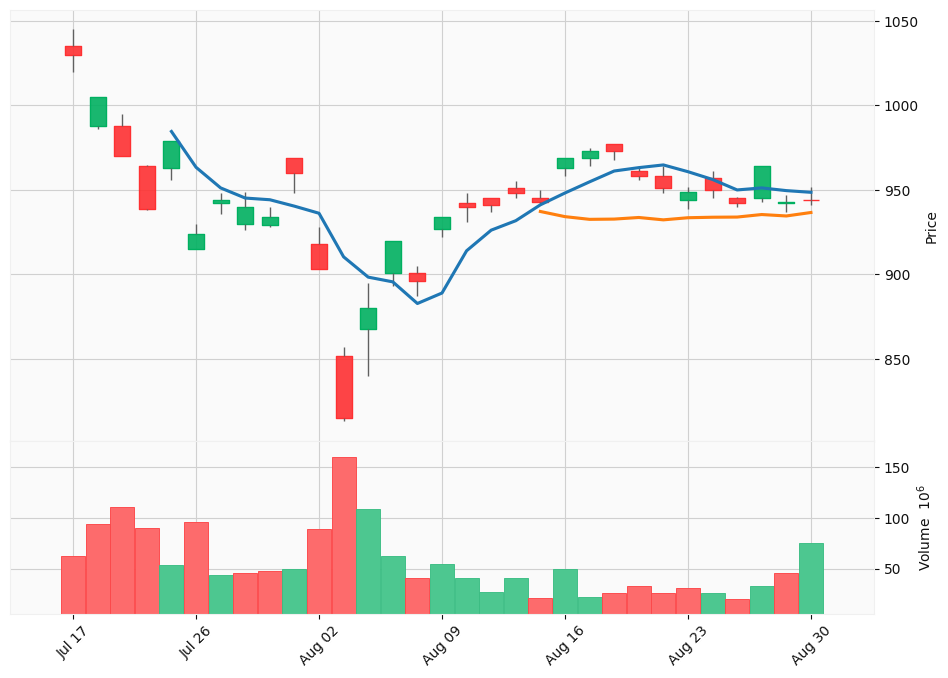

In [60]:
s=mpf.make_mpf_style(base_mpf_style='yahoo')
mpf.plot(df,type='candle',style=s,volume=True,mav=(5,20,60),figscale=1.5)



In [65]:
mav60 = df.iloc[-120:]['Close'].rolling(window=60).mean()
print(mav60)

date
2024-03-08           NaN
2024-03-11           NaN
2024-03-12           NaN
2024-03-13           NaN
2024-03-14           NaN
                 ...    
2024-08-26    948.183333
2024-08-27    949.916667
2024-08-28    952.300000
2024-08-29    953.916667
2024-08-30    955.666667
Name: Close, Length: 120, dtype: float64


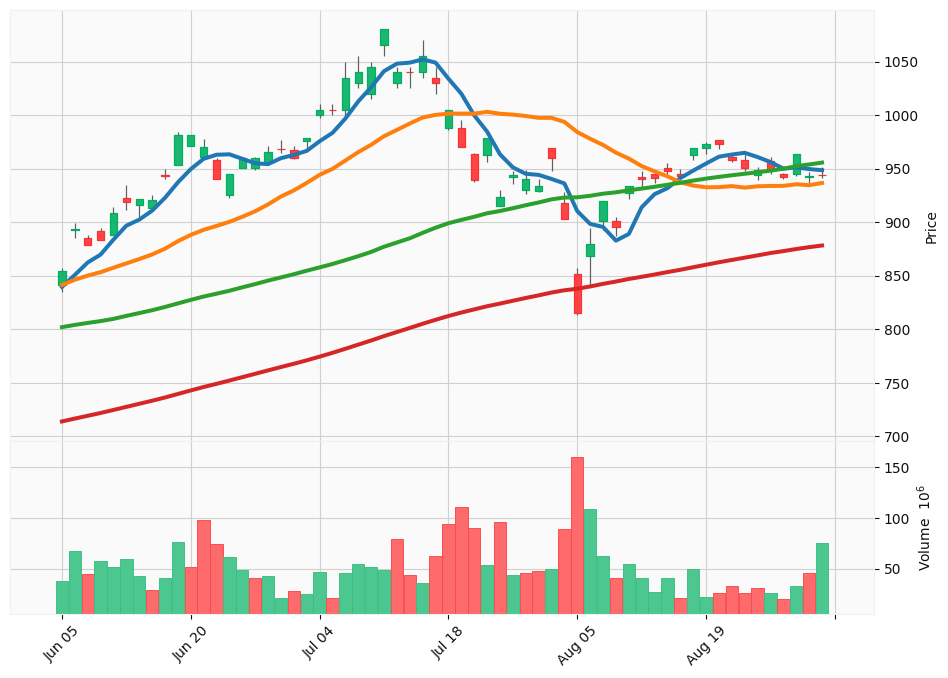

In [93]:
def plot_nday(n=60,klines=[5]):
    mav=lambda kday: mpf.make_addplot(df.iloc[-(n+kday):]['Close'].rolling(window=kday).mean()[-n:])
    ap=[mav(k) for k in klines]
    mpf.plot(df[-n:],type='candle',style=s,volume=True,figscale=1.5,addplot=ap)

plot_nday(60,klines=[5,20,60,120])